In [1]:
from plotnine import *
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("barabasi_benchmark/unified_res/barabasi_unified.csv")

In [3]:
#df = pd.read_csv("erdos_benchmark/unified_res/erdos_unified.csv")

In [4]:
df.head(5)

,graph,vertex_num,constant,congestion,real_congestion,avg_route_len,delta,max_delta,dan,most_congested_route,max_route_len,avg_tree_weight,most_tree_ratio,tree_count,type
0,barabasi-albert,25,1,38.0,0.149606,1.362205,10,6,10,"[T0 W: 0, T1 W: 11.0, T3 W: 0]",2,0.108049,1.894737,9,original
1,barabasi-albert,25,1,36.0,0.144000,1.304000,10,6,10,"[T0 W: 0, T16 W: 18.0]",2,0.108889,2.285714,9,original
2,barabasi-albert,25,1,44.0,0.188034,1.350427,10,6,10,"[T0 W: 0, T4 W: 7.0, T1 W: 0]",2,0.084693,2.037736,11,original
3,barabasi-albert,25,1,36.0,0.148760,1.438017,10,6,10,"[T16 W: 0, T22 W: 18.0]",2,0.089782,1.826087,11,original
4,barabasi-albert,25,1,42.0,0.181034,1.336207,10,10,10,"[T1 W: 0, T11 W: 7.0, T10 W: 0]",2,0.114763,2.089552,8,original


In [5]:
gdf = df[['vertex_num', 'constant', 'avg_route_len', 'dan', 'delta', 'max_delta', 'real_congestion', 'type']]

In [6]:
gdf5 = df[df['constant'] == 5]

In [7]:
gdf5

,graph,vertex_num,constant,congestion,real_congestion,avg_route_len,delta,max_delta,dan,most_congested_route,max_route_len,avg_tree_weight,most_tree_ratio,tree_count,type
80,barabasi-albert,25,5,52.0,0.055085,1.385593,10,10,10,"[T0 W: 0, T16 W: 6.0, T3 W: 4.0, T8 W: 0]",4,0.070782,2.511628,11,original
81,barabasi-albert,25,5,52.0,0.050388,1.277132,10,10,10,"[T7 W: 0, T20 W: 14.0, T16 W: 0]",3,0.074419,2.716981,10,original
82,barabasi-albert,25,5,62.0,0.068736,1.283814,10,11,10,"[T6 W: 0, T1 W: 13.0, T10 W: 0]",3,0.070147,3.000000,11,original
83,barabasi-albert,25,5,96.0,0.093567,1.346979,10,11,10,"[T5 W: 0, T2 W: 11.0, T13 W: 4.0, T6 W: 0]",3,0.073489,2.400000,10,original
84,barabasi-albert,25,5,58.0,0.056311,1.493204,10,13,10,"[T5 W: 0, T21 W: 8.0, T6 W: 0]",3,0.055825,2.823529,14,original
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31895,barabasi-albert,200,5,116.0,0.011558,1.269829,48,48,48,"[N:T7,0,[], N:T197,36.0,[], N:T19,0,[]]",2,0.018377,3.154930,60,random
31896,barabasi-albert,200,5,148.0,0.015025,1.274315,48,48,48,"[N:T5,0,[], N:T136,28.0,[], N:T199,2.0,[], N:T...",4,0.017768,3.112628,63,random
31897,barabasi-albert,200,5,104.0,0.010708,1.245675,48,48,48,"[N:T2,0,[], N:T138,34.0,[], N:T32,0,[]]",2,0.018073,3.849057,59,random
31898,barabasi-albert,200,5,108.0,0.011072,1.298339,48,48,48,"[N:T2,0,[], N:T113,30.0,[], N:T7,0,[]]",2,0.018999,3.111111,61,random


In [8]:
dta = pd.DataFrame()
for t in gdf5['type'].unique():
    z = gdf5[gdf['type'] == t].groupby('vertex_num').agg({'avg_route_len': 'mean', 'real_congestion': 'mean', 'max_delta': 'max'})
    z['type'] = t
    dta = dta.append(z)

c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
dta

,avg_route_len,real_congestion,max_delta,type
vertex_num,,,,
25,1.334247,0.056276,16,original
50,1.355547,0.029832,26,original
75,1.331332,0.021064,36,original
100,1.354479,0.017590,42,original
125,1.365525,0.014998,46,original
150,1.382367,0.013967,47,original
175,1.391757,0.012737,48,original
200,1.403300,0.012009,48,original
25,1.333111,0.057674,16,egobalance


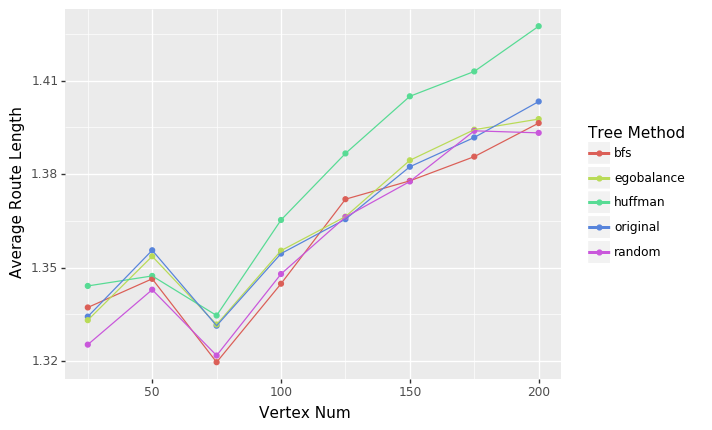

<ggplot: (15536757)>

In [10]:
ggplot(dta, aes(x=dta.index, y='avg_route_len', color='type')) \
    + geom_point() \
    + geom_line() \
    + xlab('Vertex Num') \
    + ylab('Average Route Length') \
    + labs(color='Tree Method')

In [14]:
qq = ggplot(dta, aes(x=dta.index, y='real_congestion', color='type')) \
    + geom_point() \
    + geom_line() \
    + scale_y_continuous() \
    + xlab('Vertex Num') \
    + ylab('Average Congestion') \
    + labs(color='Tree Building Startegy') \
    + geom_hline(yintercept=0.005)

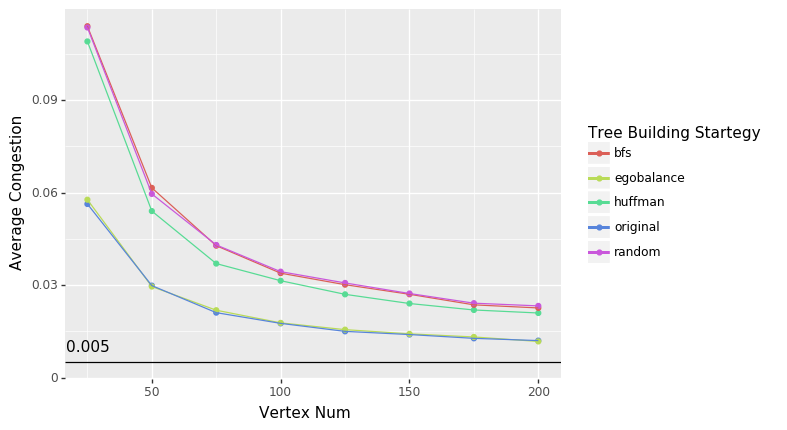

<ggplot: (17314455)>

In [15]:
qq + annotate("text", x=25, y=0.01, label='0.005')

In [13]:
qq.save("qwe.png")

c:\program files (x86)\python37-32\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
c:\program files (x86)\python37-32\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: qwe.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
